## Recoding to group ratings into beginner, intermediate and advanced categories

In [2]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [3]:
chess = pd.read_csv("chess.csv")

In [33]:
chess.white_rating.value_counts()

1500    812
1480     51
1400     48
1536     46
1708     45
       ... 
2373      1
2485      1
2613      1
788       1
907       1
Name: white_rating, Length: 1516, dtype: int64

In [34]:
chess.white_rating.min()

784

In [35]:
chess.white_rating.max()

2700

In [36]:
chess.black_rating.min()

789

In [37]:
chess.black_rating.max()

2723

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## most used opening moves overall

Text(0, 0.5, 'Frequency')

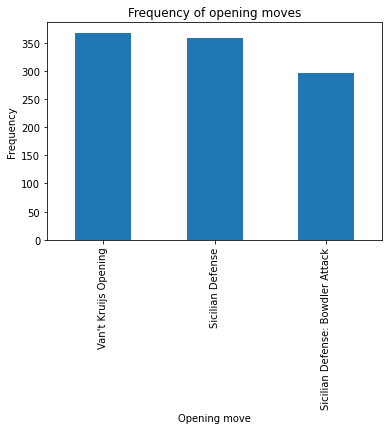

In [6]:
Opener = chess['opening_name'].value_counts(). head(3).plot(kind="bar")
Opener.set_title("Frequency of opening moves")
Opener.set_xlabel("Opening move")
Opener.set_ylabel("Frequency")

## Graphing the three most used opening moves by beginner, intermediate and advanced players

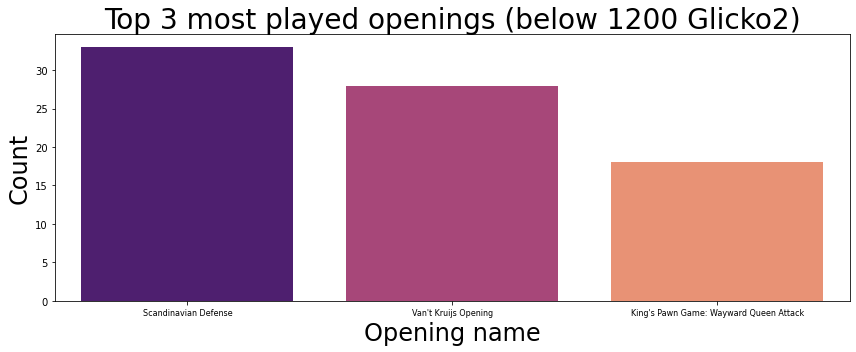

In [39]:
beginner = chess[(chess['white_rating'] < 1200) & (chess['black_rating'] < 1200)]['opening_name'].value_counts().head(3)
plt.figure(figsize=(12, 5))
plt.title('Top 3 most played openings (below 1200 Glicko2)', fontsize=28)
plt.xlabel('Opening name', fontsize=24)
plt.xticks(fontsize=8)
plt.ylabel('Count', fontsize=24)
plt.yticks(fontsize=10)
sns.barplot(x=beginner.index, y=beginner.values, palette='magma')
plt.tight_layout()
plt.show()

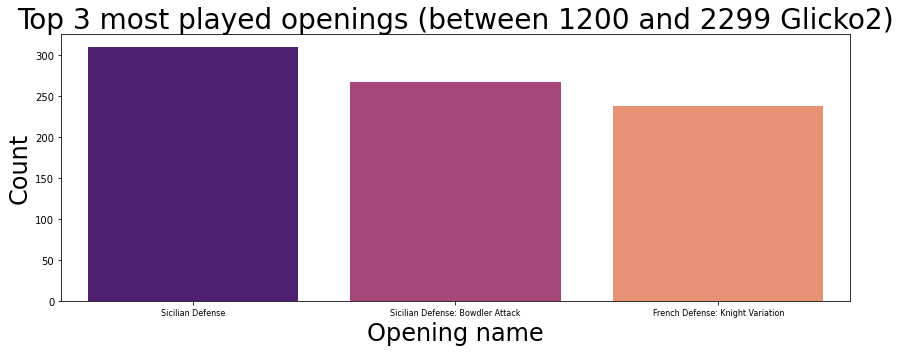

In [42]:
intermediate = chess[(chess['white_rating'].between(1200, 2299)) & (chess['black_rating'].between(1200, 2299))]['opening_name'].value_counts().head(3)
plt.figure(figsize=(12, 5))
plt.title('Top 3 most played openings (between 1200 and 2299 Glicko2)', fontsize=28)
plt.xlabel('Opening name', fontsize=24)
plt.xticks(fontsize=8)
plt.ylabel('Count', fontsize=24)
plt.yticks(fontsize=10)
sns.barplot(x=intermediate.index, y=intermediate.values, palette='magma')
plt.tight_layout()
plt.show()

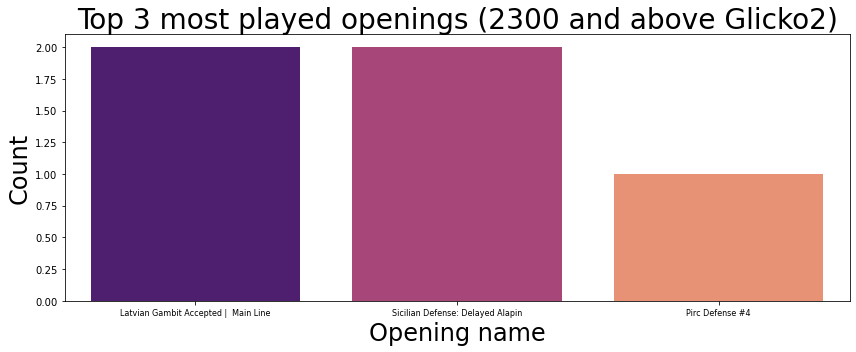

In [43]:
advanced = chess[(chess['white_rating'] > 2299) & (chess['black_rating'] > 2299)]['opening_name'].value_counts().head(3)
plt.figure(figsize=(12, 5))
plt.title('Top 3 most played openings (2300 and above Glicko2)', fontsize=28)
plt.xlabel('Opening name', fontsize=24)
plt.xticks(fontsize=8)
plt.ylabel('Count', fontsize=24)
plt.yticks(fontsize=10)
sns.barplot(x=advanced.index, y=advanced.values, palette='magma')
plt.tight_layout()
plt.show()

## Histogram of white player ratings

<AxesSubplot:>

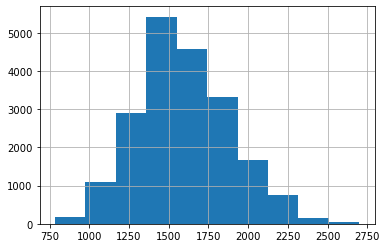

In [44]:
chess.white_rating.hist()

<AxesSubplot:>

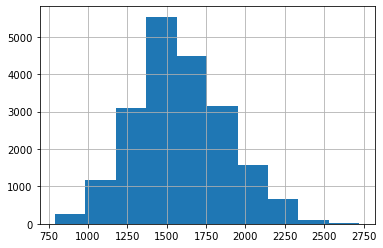

In [45]:
chess.black_rating.hist()

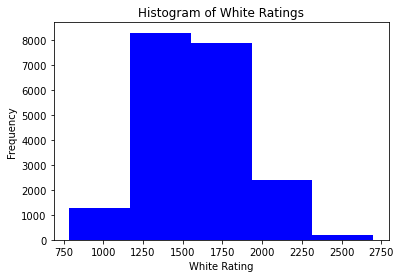

In [65]:
num_bins = 5
n, bins, patches = plt.hist(chess['white_rating'], num_bins, facecolor='blue', alpha=1)
plt.xlabel('White Rating')
plt.ylabel('Frequency')
plt.title('Histogram of White Ratings')
plt.show()

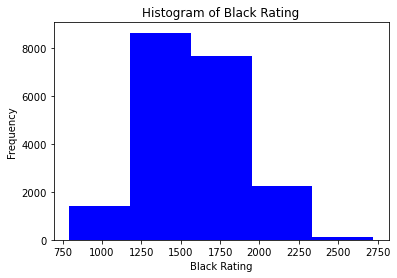

In [64]:
num_bins = 5
n, bins, patches = plt.hist(chess['black_rating'], num_bins, facecolor='blue', alpha=1)
plt.xlabel('Black Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Black Rating')
plt.show()

In [24]:
chess2

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
636,xSwSmC1e,True,1.500000e+12,1.500000e+12,86,resign,black,10+0,chilon,2306,chesscarl,2405,e4 e5 Nf3 Nc6 Nc3 Nf6 Nxe5 Nxe5 d4 Nc6 d5 Bb4 ...,C46,Four Knights Game: Halloween Gambit,7
637,TovD1oTY,True,1.500000e+12,1.500000e+12,58,resign,black,10+0,loebas,2422,chesscarl,2386,e4 c5 d4 cxd4 c3 Nf6 e5 Nd5 cxd4 d6 exd6 Qxd6 ...,B22,Sicilian Defense: Alapin Variation | Smith-Mo...,8
638,u0FzSAO8,True,1.500000e+12,1.500000e+12,50,resign,black,10+0,thelordoftheboard,2373,chesscarl,2356,e4 c5 Nf3 Nc6 d4 cxd4 Nxd4 Nf6 Nc3 e5 Ndb5 d6 ...,B33,Sicilian Defense: Lasker-Pelikan Variation | ...,17
639,1YmgTIJI,True,1.500000e+12,1.500000e+12,62,resign,black,10+0,lebbeusz2450,2325,chesscarl,2338,d4 Nf6 Nf3 d5 g3 Bf5 Bg2 e6 O-O Be7 c4 c6 Nc3 ...,D02,Queen's Pawn Game: Symmetrical Variation | Ps...,5
643,mquRdEhM,True,1.500000e+12,1.500000e+12,84,mate,black,10+0,angel2006,1879,chesscarl,2326,e4 c5 Nf3 d6 Bb5+ Bd7 Qe2 Nc6 Nc3 a6 Bxc6 Bxc6...,B52,Sicilian Defense: Canal Attack | Main Line,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,YemSINSx,False,1.504460e+12,1.504460e+12,13,resign,black,10+25,grsa,1254,grandmasterreturn,2344,d4 Nf6 c4 e6 Nf3 d5 Nc3 c6 Bf4 Qa5 e3 Bb4 cxd5,D43,Semi-Slav Defense,8
19530,PcsDFJAL,False,1.502680e+12,1.502680e+12,28,resign,black,10+30,chesspopper88,1972,chessninja48,2447,c4 e6 Nc3 d5 d4 Nf6 Bg5 Be7 e3 h6 Bh4 O-O Nf3 ...,D57,Queen's Gambit Declined: Tartakower Variation ...,16
19611,oK51C1ur,False,1.502660e+12,1.502660e+12,54,resign,black,30+30,mamaduck,1334,sparklehorse,2475,d4 e6 c4 b6 Nc3 Bb7 a3 g6 e4 Bg7 Nf3 d6 Be2 Nd...,A40,English Defense,4
20003,d9X08Sof,True,1.504210e+12,1.504220e+12,103,draw,draw,30+30,moistvonlipwig,2283,chess4life,2358,e4 c5 Nc3 e6 f4 d5 Nf3 dxe4 Nxe4 Nc6 b3 Nf6 Bd...,B23,Sicilian Defense: Closed,4


<AxesSubplot:>

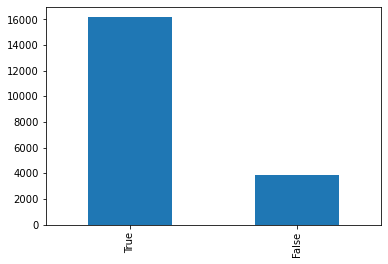

In [51]:
chess['rated'].value_counts().plot(kind='bar')

<AxesSubplot:>

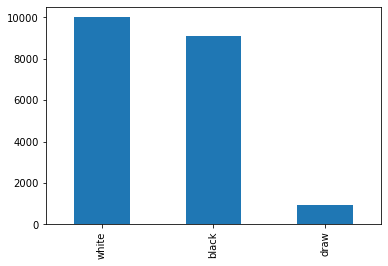

In [52]:
chess['winner'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Frequency')

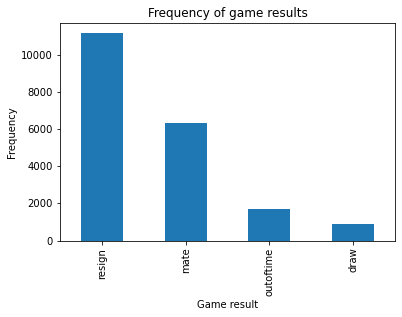

In [63]:
Victory_status = chess['victory_status'].value_counts().plot(kind="bar")
Victory_status.set_title("Frequency of game results")
Victory_status.set_xlabel("Game result")
Victory_status.set_ylabel("Frequency")

<AxesSubplot:>

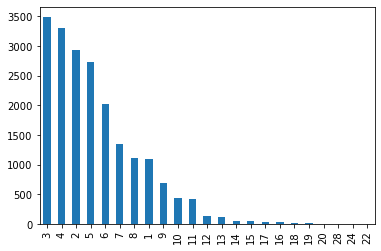

In [54]:
chess['opening_ply'].value_counts().plot(kind="bar")

Text(0, 0.5, 'Frequency')

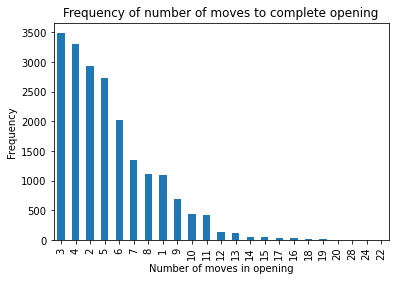

In [56]:
OpeningMoveNumber = chess['opening_ply'].value_counts().plot(kind="bar")
OpeningMoveNumber.set_title("Frequency of number of moves to complete opening")
OpeningMoveNumber.set_xlabel("Number of moves in opening")
OpeningMoveNumber.set_ylabel("Frequency")

Text(0, 0.5, 'Turns')

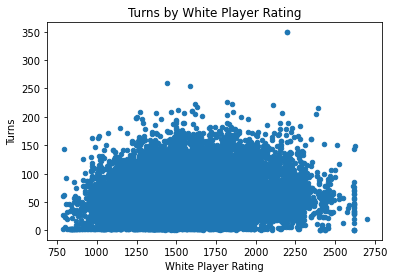

In [58]:
Plot = chess.plot.scatter(x='white_rating', y='turns')
Plot.set_title("Turns by White Player Rating")
Plot.set_xlabel("White Player Rating")
Plot.set_ylabel("Turns")

Text(0, 0.5, 'Black Rating')

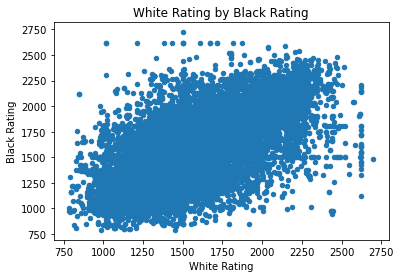

In [61]:
Plot = chess.plot.scatter(x='white_rating', y='black_rating')
Plot.set_title("White Rating by Black Rating")
Plot.set_xlabel("White Rating")
Plot.set_ylabel("Black Rating")